In [171]:
import pandas as pd
from nltk import FreqDist
import matplotlib.pyplot as plt

## Change log
- I got a high number of words ocurring once, after removing URLs and usernames (@) this reduced from 19867 to 7348 words.
- After removing stop words unique words reduced from 13218 to 13079
- After applying lemmatization (WordNetLemmatizer) unique words reduced from 13079 to 12209 and words ocurring once from 7346 to 6868.
- After removing hashtags words ocurring once from 6868 to 5527.
- After removing specific stop words (amp [from &amp;], got, get, ...) I got more meaninful words in top words

## Load data frames (created by preprocess.py)

In [172]:
df = pd.read_pickle('./text/vaccination_tweets.pkl')
print(df.shape)

(10920, 17)


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10920 entries, 0 to 11019
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10920 non-null  int64 
 1   user_name         10920 non-null  object
 2   user_location     8674 non-null   object
 3   user_description  10251 non-null  object
 4   user_created      10920 non-null  object
 5   user_followers    10920 non-null  int64 
 6   user_friends      10920 non-null  int64 
 7   user_favourites   10920 non-null  int64 
 8   user_verified     10920 non-null  bool  
 9   date              10920 non-null  object
 10  text              10920 non-null  object
 11  hashtags          8366 non-null   object
 12  source            10919 non-null  object
 13  retweets          10920 non-null  int64 
 14  favorites         10920 non-null  int64 
 15  is_retweet        10920 non-null  bool  
 16  tokens            10920 non-null  object
dtypes: bool(2), int64

## Create a corpus on entire dataset

In [174]:
corpus = df['tokens'].map(lambda x: ' '.join(x))

## Word frequency

In [175]:
fd = FreqDist(df['tokens'].explode())
unique_tokens = fd.B()
print('Total tokens', fd.N())
print('Unique words', unique_tokens)
print('Words ocurring once', len(fd.hapaxes()))


Total tokens 79670
Unique words 10291
Words ocurring once 5527


### Some words ocurring once

In [176]:
fd.hapaxes()[:10]

['daikon',
 'paste',
 'cytokine',
 'immutable',
 'sturdy',
 'fame',
 'patriotic',
 'competition',
 'closing',
 'offic']

## Most common words

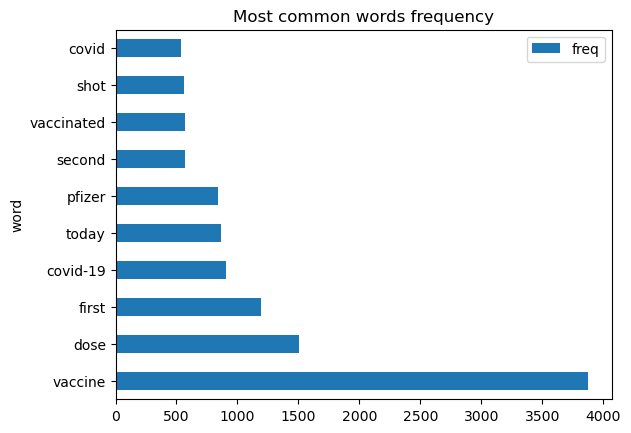

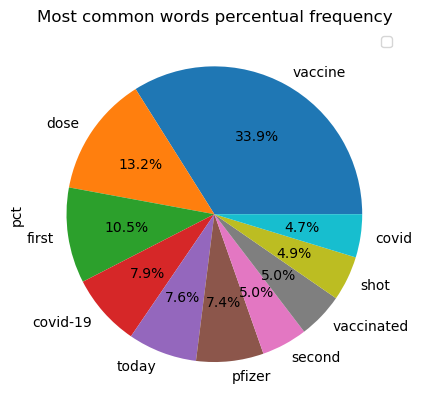

In [177]:
words_freq = { 'word': [], 'freq': [], 'pct': []} # 
for [word, freq] in fd.most_common(10):
    words_freq['word'].append(word)
    words_freq['freq'].append(freq)
    words_freq['pct'].append(fd.freq(word))
df_words_freq = pd.DataFrame(data=words_freq)

ax = df_words_freq.plot.barh(x='word', y='freq')
ax.set_title('Most common words frequency')
ax = df_words_freq.plot.pie(y='pct', autopct='%1.1f%%', labels=df_words_freq['word'])
ax.set_title('Most common words percentual frequency')
ax.legend([])
plt.show()

## Word length distribution

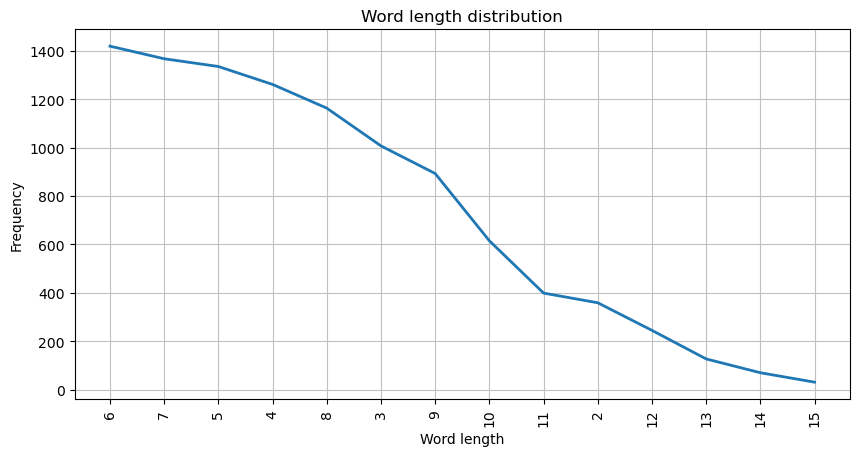

In [178]:
word_lengths = [len(word) for word in fd.keys()]
word_length_distribution = FreqDist(word_lengths)
plt.figure().set_figwidth(10)
ax = word_length_distribution.plot(title='Word length distribution', show=False)
ax.set_xlabel('Word length')
ax.set_ylabel('Frequency')
plt.show()

### Some words of extreme length

In [179]:
lengths = sorted(word_length_distribution.keys())
extreme_lengths = lengths[0:2] + lengths[-2:]
for i in extreme_lengths:
    words = list([word for word in fd.keys() if len(word) == i])
    print('Words of {} characters:'.format(i))
    print(' - Total', len(words))
    print(' - Sample', words[:10])

Words of 2 characters:
 - Total 359
 - Sample ['ev', 'uk', 'le', '24', 'go', 'po', '23', '21', '1-', '--']
Words of 3 characters:
 - Total 1007
 - Sample ['2-4', 'bit', 'sad', 'usa', 'day', 'say', '300', '000', 'new', '145']
Words of 14 characters:
 - Total 70
 - Sample ['administration', 'pharmaceutical', 'rempel-trudeau', 'congratulation', 'pre-determined', 'recommendation', 'turkish-german', 'epidemiologist', 'identification', 'worcestershire']
Words of 15 characters:
 - Total 31
 - Sample ['pfizer-biontech', 'finger-pointing', 'shields-carnley', 'biontech-pfizer', 'president-elect', 'explainer-where', 'confidentiality', 'evidenced-based', 'auto-translated', 'volunteers-wiki']
